In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cumulative_burnt_weekly = pd.read_csv('/Users/tanmaymahindrakar/Documents/Wildfire_data/1- cumulative-area-burnt-by-wildfires-by-week.csv')
annual_burnt = pd.read_csv('/Users/tanmaymahindrakar/Documents/Wildfire_data/2- annual-area-burnt-by-wildfires.csv')
share_land_burnt = pd.read_csv('/Users/tanmaymahindrakar/Documents/Wildfire_data/3- share-of-the-total-land-area-burnt-by-wildfires-each-year.csv')
annual_burnt_per_wildfire = pd.read_csv('/Users/tanmaymahindrakar/Documents/Wildfire_data/4- annual-area-burnt-per-wildfire.csv')
annual_burned_area_landcover = pd.read_csv('/Users/tanmaymahindrakar/Documents/Wildfire_data/5- annual-burned-area-by-landcover.csv')

In [5]:
cumulative_burnt_weekly.head(2)


,Entity,Code,Year,Cumulative area burnt by wildfires in 2024,Cumulative area burnt by wildfires in 2023,Cumulative area burnt by wildfires in 2022,Cumulative area burnt by wildfires in 2021,Cumulative area burnt by wildfires in 2020,Cumulative area burnt by wildfires in 2019,Cumulative area burnt by wildfires in 2018,Cumulative area burnt by wildfires in 2017,Cumulative area burnt by wildfires in 2016,Cumulative area burnt by wildfires in 2015,Cumulative area burnt by wildfires in 2014,Cumulative area burnt by wildfires in 2013,Cumulative area burnt by wildfires in 2012
0,Afghanistan,AFG,1,391.0,0,0,1246,0,0,117,0,0,368,0,0,0
1,Afghanistan,AFG,2,559.0,0,0,2680,963,20,117,82,0,425,426,0,0


In [6]:
annual_burnt.head(2)


,Entity,Code,Year,Annual area burnt by wildfires
0,Afghanistan,AFG,2012,10430
1,Afghanistan,AFG,2013,5892


In [7]:
share_land_burnt.head(2)

,Entity,Code,Year,Annual share of the total land area burnt by wildfires
0,Afghanistan,AFG,2012,0.015976
1,Afghanistan,AFG,2013,0.009025


In [8]:
annual_burnt_per_wildfire.head(2)

,Entity,Code,Year,Annual area burnt per wildfire
0,Afghanistan,AFG,2012,4814.7446
1,Afghanistan,AFG,2013,4389.3335


In [9]:
annual_burned_area_landcover.head(2)

,Entity,Code,Year,Yearly burned area across other land categories,Yearly burned area across croplands,Yearly burned area across forests,Yearly burned area across savannas,Yearly burned area across shrublands and grasslands
0,Afghanistan,AFG,2002,0.000,14167.473,0.0,0.0,18052.793
1,Afghanistan,AFG,2003,1309.418,21680.530,0.0,0.0,112030.360


In [10]:
# Check for missing values in each DataFrame

cumulative_burnt_weekly.isnull().sum()
annual_burnt.isnull().sum()
share_land_burnt.isnull().sum()
annual_burnt_per_wildfire.isnull().sum()
annual_burned_area_landcover.isnull().sum()

Entity                                                   0
Code                                                   126
Year                                                     0
Yearly burned area across other land categories          0
Yearly burned area across croplands                      0
Yearly burned area across forests                        0
Yearly burned area across savannas                       0
Yearly burned area across shrublands and grasslands      0
dtype: int64

In [11]:
# Rename the column

cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2024': '2024'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2023': '2023'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2022': '2022'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2021': '2021'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2020': '2020'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2019': '2019'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2018': '2018'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2017': '2017'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2016': '2016'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2015': '2015'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2014': '2014'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2013': '2013'}, inplace=True)
cumulative_burnt_weekly.rename(columns={'Cumulative area burnt by wildfires in 2012': '2012'}, inplace=True)

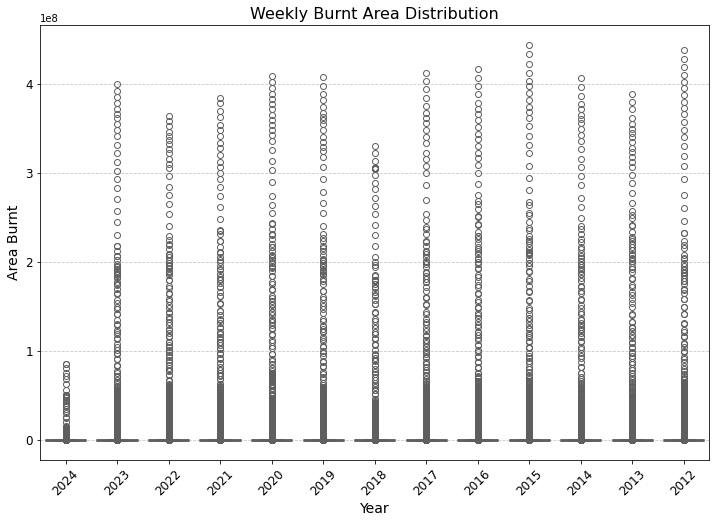

In [12]:
data_for_boxplot = cumulative_burnt_weekly.drop(['Entity', 'Code', 'Year'], axis=1)

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_for_boxplot, palette="Set3", linewidth=2.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Weekly Burnt Area Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Area Burnt', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

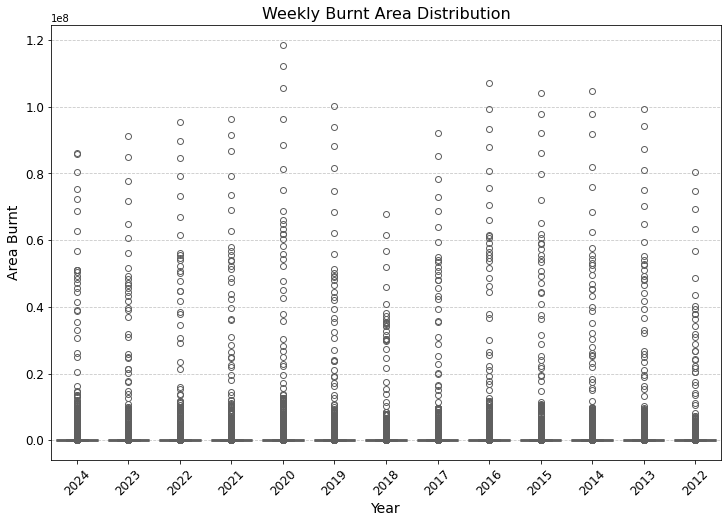

In [13]:
# Drop unnecessary columns
data_for_boxplot = cumulative_burnt_weekly.drop(['Entity', 'Code', 'Year'], axis=1)

# Convert numeric columns to appropriate numeric types
data_for_boxplot = data_for_boxplot.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data_for_boxplot.dropna(inplace=True)

plt.figure(figsize=(12, 8))
sns.boxplot(data=data_for_boxplot, palette="Set3", linewidth=2.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Weekly Burnt Area Distribution', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Area Burnt', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

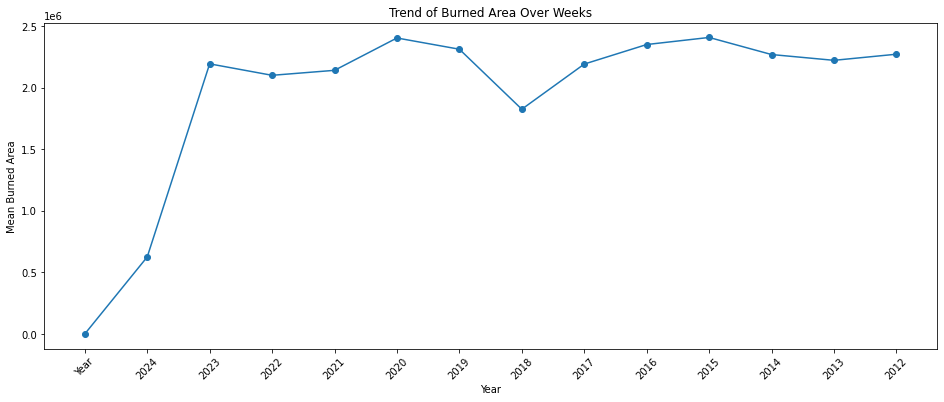

In [14]:
# The columns containing non-numeric values are dropped before calculating the mean
numeric_columns = cumulative_burnt_weekly.select_dtypes(include=[np.number])

# Calculate the mean
mean_burned_area_per_week = numeric_columns.mean(axis=0)

plt.figure(figsize=(16, 6))
plt.plot(mean_burned_area_per_week.index, mean_burned_area_per_week.values, marker='o')
plt.title('Trend of Burned Area Over Weeks')
plt.xlabel('Year')
plt.ylabel('Mean Burned Area')
plt.xticks(rotation=45)
plt.show()

In [15]:
annual_burnt.describe()


,Year,Annual area burnt by wildfires
count,3354.000000,3.354000e+03
mean,2018.000000,4.368101e+06
std,3.742215,2.857829e+07
min,2012.000000,0.000000e+00
25%,2015.000000,0.000000e+00
50%,2018.000000,9.253000e+03
75%,2021.000000,3.806550e+05
max,2024.000000,4.435116e+08


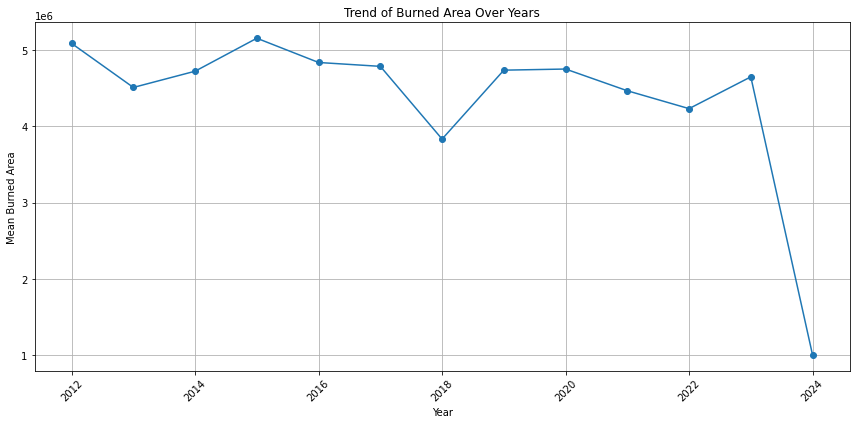

In [16]:
# Convert 'Year' column to numeric, replacing non-numeric values with NaN
annual_burnt['Year'] = pd.to_numeric(annual_burnt['Year'], errors='coerce')

# Remove rows with NaN values in the 'Year' column
annual_burnt = annual_burnt.dropna(subset=['Year'])

# Calculate the mean burned area for each year
mean_burned_area_per_year = annual_burnt.groupby('Year')['Annual area burnt by wildfires'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_burned_area_per_year.index, mean_burned_area_per_year.values, marker='o')
plt.title('Trend of Burned Area Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Burned Area')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


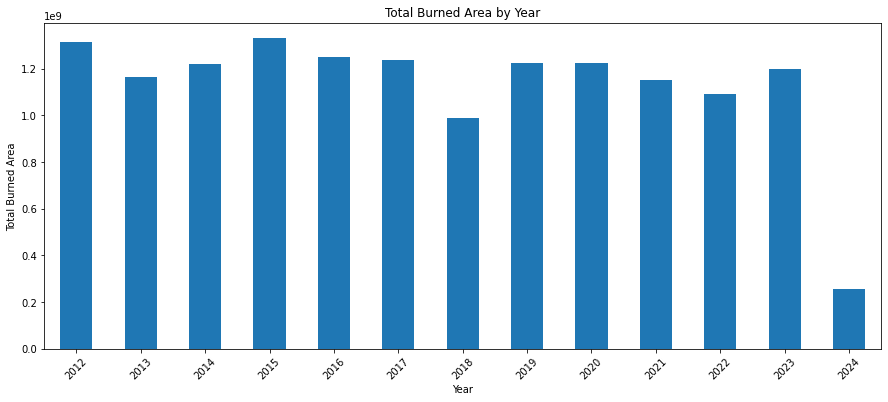

In [20]:
# Calculate total burned area by year
total_burned_area_by_year = annual_burnt.groupby('Year')['Annual area burnt by wildfires'].sum()

total_burned_area_by_year.plot(kind='bar', figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Total Burned Area')
plt.title('Total Burned Area by Year')
plt.xticks(rotation=45)
plt.show()

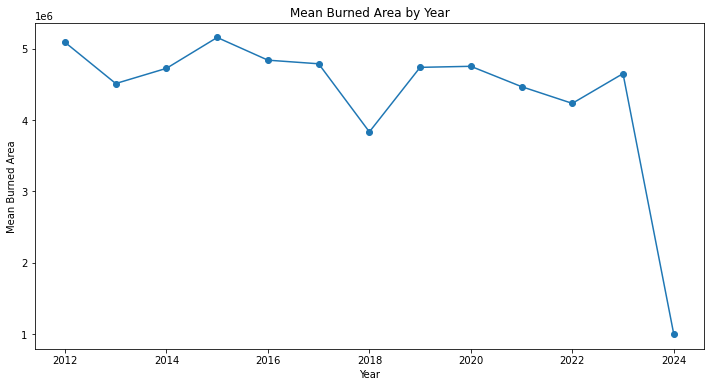

In [21]:
# Calculate the mean of the 'Annual area burnt by wildfires' column grouped by 'Year'
annual_mean_burned_area = annual_burnt.groupby('Year')['Annual area burnt by wildfires'].mean()

plt.figure(figsize=(12, 6))
plt.plot(annual_mean_burned_area.index, annual_mean_burned_area.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Burned Area')
plt.title('Mean Burned Area by Year')
plt.show()

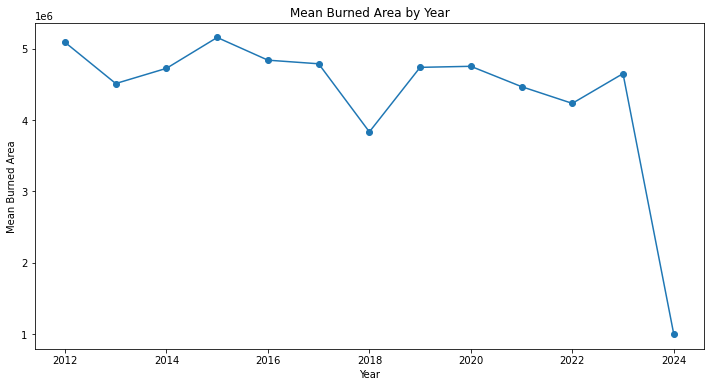

In [22]:
# Convert 'Annual area burnt by wildfires' column to numeric
annual_burnt['Annual area burnt by wildfires'] = pd.to_numeric(annual_burnt['Annual area burnt by wildfires'], errors='coerce')

# Calculate the mean of the 'Annual area burnt by wildfires' column grouped by 'Year'
annual_mean_burned_area = annual_burnt.groupby('Year')['Annual area burnt by wildfires'].mean()

plt.figure(figsize=(12, 6))
plt.plot(annual_mean_burned_area.index, annual_mean_burned_area.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Burned Area')
plt.title('Mean Burned Area by Year')
plt.show()

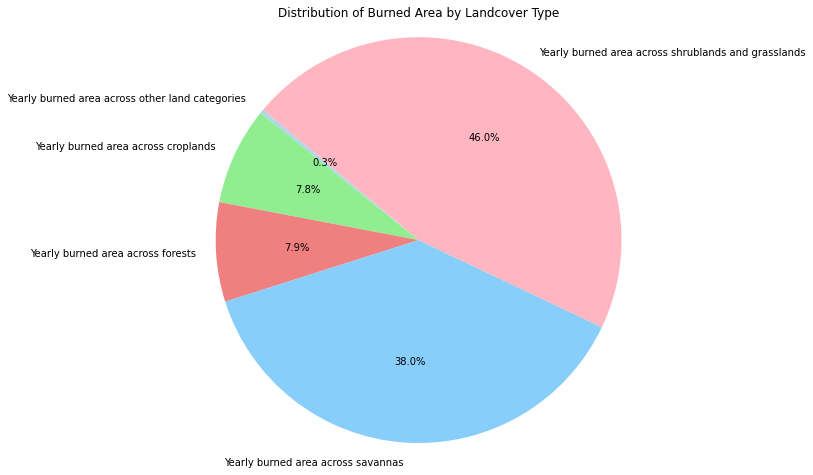

In [23]:
# Aggregate the data to get the sum of burned areas for each landcover type
landcover_totals = annual_burned_area_landcover.drop(['Entity', 'Code', 'Year'], axis=1).sum()

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink']
plt.figure(figsize=(8, 8))
plt.pie(landcover_totals, labels=landcover_totals.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Burned Area by Landcover Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

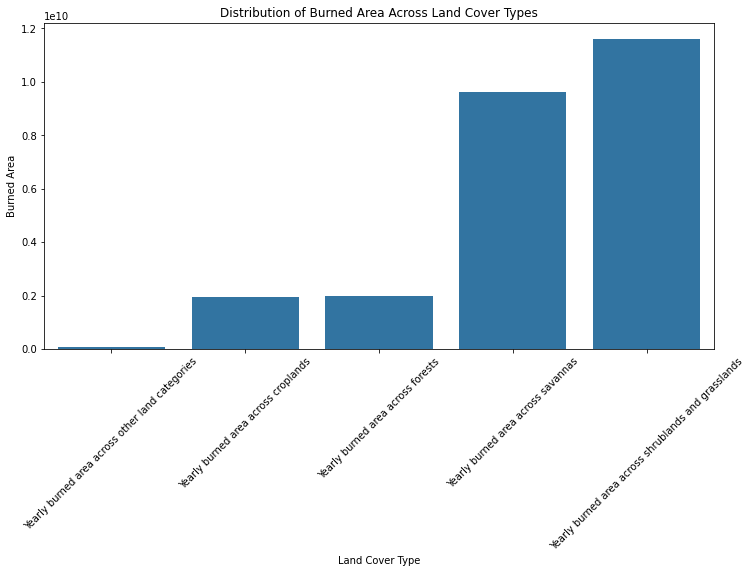

In [24]:
# Calculate the sum of burned areas for each land cover type
landcover_totals = annual_burned_area_landcover.drop(['Entity', 'Code', 'Year'], axis=1).sum()

# Convert the index of landcover_totals to a column
landcover_totals = landcover_totals.reset_index()

# Rename the columns
landcover_totals.columns = ['Land Cover Type', 'Burned Area']

plt.figure(figsize=(12, 6))
sns.barplot(x='Land Cover Type', y='Burned Area', data=landcover_totals)
plt.xticks(rotation=45)
plt.title('Distribution of Burned Area Across Land Cover Types')
plt.xlabel('Land Cover Type')
plt.ylabel('Burned Area')
plt.show()

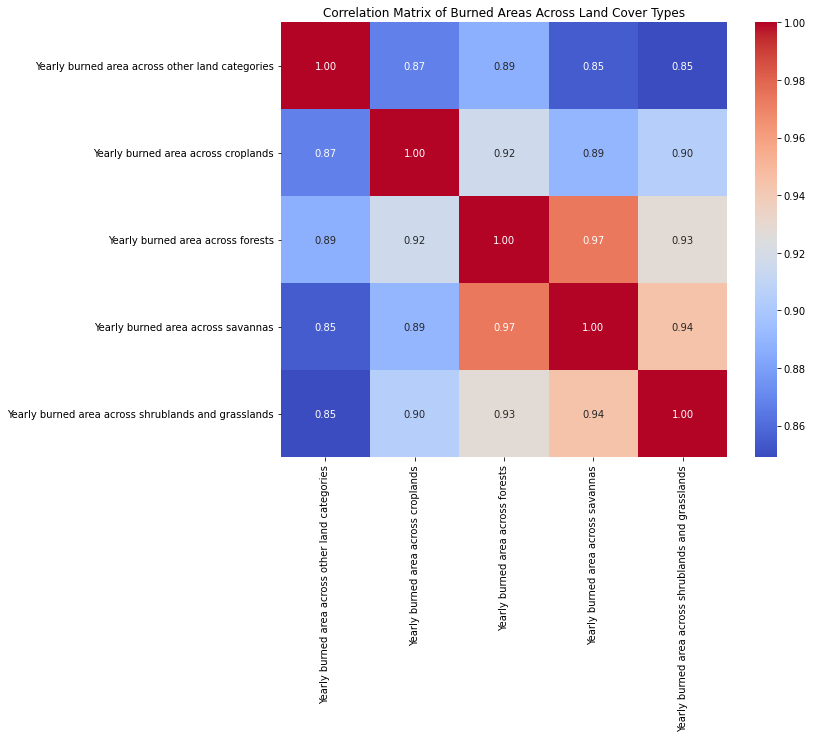

In [25]:
# Exclude non-numeric columns before calculating the correlation matrix
numeric_data = annual_burned_area_landcover.drop(['Entity', 'Code', 'Year'], axis=1)

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Burned Areas Across Land Cover Types')
plt.show()